# Лабораторная работа 2. Методы анализа параметров компонентов моделей функционирования КИС
Выполнил: Пакало Александр Сергеевич РТ5-81Б

Вариант: 5

## Задание 1

Подготовим датасет для исследования

In [458]:
Variant <- 5
NRows <- 5
set.seed(Variant)
X1 <- sample(c(1:20), NRows)
X2 <- sample(c(3:100), NRows)
X3 <- sample(c(0:40), NRows)

pp1 <- runif(5)
p1 <- pp1 / sum(pp1)

pp2 <- runif(5)
p2 <- pp2 / sum(pp2)

pp3 <- runif(5)
p3 <- pp3 / sum(pp3)

In [459]:
df <- data.frame(X1, X2, X3, p1, p2, p3)
View(df)

X1,X2,X3,p1,p2,p3
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
2,43,2,0.40686825,0.1610350,0.53915046
11,87,37,0.32939564,0.1467735,0.07196561
15,96,11,0.09659285,0.3241292,0.33356559
19,73,15,0.10316386,0.0476192,0.03776129
9,21,25,0.06397940,0.3204431,0.01755706


## Задание 1.1

Для численного вычисления статистических характеристик понадобятся сгенерированные распределения. Реализуем это с помощью следующих функций.

Разделяем отрезок на подотрезки длиной в $p_i$.

In [460]:
# Получаем значение, соответствующее отрезку.
# За отрезки отвечает параметр p, хранящий последовательность длин.
getValueInRange <- function(v, X, p) {
  border <- 0
  for (i in 1:length(p)) {
    border <- border + p[i]
    if (v < border) {
      return(X[i])
    }
  }
}

Генерируем N значений по распределению, заданному X и p векторами из датасета.

In [461]:
N <- 100000

# Генерируем случайную величину.
generateValues <- function(X, p) {
  generatedValues <- c()
  for (i in 1:N) {
    generatedValues <- append(generatedValues, getValueInRange(runif(1), X, p))
  }

  return(generatedValues)
}

Далее сгенерированные распределения нам понадобятся много раз, поэтому заведем для них переменные заранее, чтобы не тратить время на генерацию каждый раз.

In [462]:
GeneratedX1 <- generateValues(X1, p1)

In [463]:
GeneratedX2 <- generateValues(X2, p2)

In [464]:
GeneratedX3 <- generateValues(X3, p3)

In [465]:
GeneratedValues <-list(GeneratedX1, GeneratedX2, GeneratedX3)

### Вычисление MX

#### Теоретически

In [466]:
TheoreticalMX <- c()

In [467]:
TheoreticalMX <- append(TheoreticalMX, sum(X1 * p1))

In [468]:
TheoreticalMX <- append(TheoreticalMX, sum(X2 * p2))

In [469]:
TheoreticalMX <- append(TheoreticalMX, sum(X3 * p3))

In [470]:
TheoreticalMX <- append(TheoreticalMX, sum(TheoreticalMX))

In [471]:
resultsDf <- data.frame(TheoreticalMX)
row.names(resultsDf) <- c('X1', 'X2', 'X3', 'X1+X2+X3')
View(resultsDf)

,TheoreticalMX
,<dbl>
X1,8.421909
X2,61.015709
X3,8.415596
X1+X2+X3,77.853214


#### Численный

In [472]:
ExperimentalMX <- lapply(GeneratedValues, mean)

Так как переменные независимы, можно просто сложить из математические ожидания.

In [473]:
ExperimentalMX <- append(ExperimentalMX, sum(unlist(ExperimentalMX)))

In [474]:
resultsDf$ExperimentalMX <- unlist(ExperimentalMX)
View(resultsDf)

,TheoreticalMX,ExperimentalMX
,<dbl>,<dbl>
X1,8.421909,8.35924
X2,61.015709,61.09165
X3,8.415596,8.40512
X1+X2+X3,77.853214,77.85601


### Вычисление DX

#### Теоретически

In [475]:
TheoreticalDX <- c()

In [476]:
TheoreticalDX <- append(TheoreticalDX, sum(df$p1 * (df$X1 - resultsDf$ExperimentalMX[1])^2))

In [477]:
TheoreticalDX <- append(TheoreticalDX, sum(df$p2 * (df$X2 - resultsDf$ExperimentalMX[2])^2))

In [478]:
TheoreticalDX <- append(TheoreticalDX, sum(df$p3 * (df$X3 - resultsDf$ExperimentalMX[3])^2))

Так как переменные независимы, можно просто сложить их дисперсии.

In [479]:
TheoreticalDX <- append(TheoreticalDX, sum(TheoreticalDX))

In [480]:
resultsDf$TheoreticalDX <- TheoreticalDX
View(resultsDf)

,TheoreticalMX,ExperimentalMX,TheoreticalDX
,<dbl>,<dbl>,<dbl>
X1,8.421909,8.35924,34.71759
X2,61.015709,61.09165,1068.02409
X3,8.415596,8.40512,89.68627
X1+X2+X3,77.853214,77.85601,1192.42795


#### Численный

In [481]:
ExperimentalDX <- lapply(GeneratedValues, var)

Так как переменные независимы, можно просто сложить их дисперсии.

In [482]:
ExperimentalDX <- append(ExperimentalDX, sum(unlist(ExperimentalDX)))

In [483]:
resultsDf$ExperimentalDX <- unlist(ExperimentalDX)
View(resultsDf)

,TheoreticalMX,ExperimentalMX,TheoreticalDX,ExperimentalDX
,<dbl>,<dbl>,<dbl>,<dbl>
X1,8.421909,8.35924,34.71759,34.76703
X2,61.015709,61.09165,1068.02409,1065.82789
X3,8.415596,8.40512,89.68627,88.97503
X1+X2+X3,77.853214,77.85601,1192.42795,1189.56995


### Вычисление dx
Несложно высчитать dx из имеющихся столбцов DX

In [484]:
resultsDf$Theoreticaldx <- unlist(lapply(resultsDf$TheoreticalDX, sqrt))
resultsDf$Experimentaldx <- unlist(lapply(resultsDf$ExperimentalDX, sqrt))
View(resultsDf)

,TheoreticalMX,ExperimentalMX,TheoreticalDX,ExperimentalDX,Theoreticaldx,Experimentaldx
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,8.421909,8.35924,34.71759,34.76703,5.892164,5.896358
X2,61.015709,61.09165,1068.02409,1065.82789,32.680638,32.647020
X3,8.415596,8.40512,89.68627,88.97503,9.470283,9.432658
X1+X2+X3,77.853214,77.85601,1192.42795,1189.56995,34.531550,34.490143


### Вычисление K
Вычислим K, коэффициент вариации, аналогично dx

In [485]:
mapply(function(a, b) a / b, 1:4, c(2, 4, 3, 8))

[1] 0.5 0.5 1.0 0.5

In [486]:
calcK <- function(dx, mx) {
  return(dx / mx * 100)
}

In [487]:
resultsDf$TheoreticalK <- mapply(calcK, resultsDf$Theoreticaldx, resultsDf$TheoreticalMX)
View(resultsDf)

,TheoreticalMX,ExperimentalMX,TheoreticalDX,ExperimentalDX,Theoreticaldx,Experimentaldx,TheoreticalK
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,8.421909,8.35924,34.71759,34.76703,5.892164,5.896358,69.96233
X2,61.015709,61.09165,1068.02409,1065.82789,32.680638,32.647020,53.56102
X3,8.415596,8.40512,89.68627,88.97503,9.470283,9.432658,112.53254
X1+X2+X3,77.853214,77.85601,1192.42795,1189.56995,34.531550,34.490143,44.35469


In [488]:
resultsDf$ExperimentalK <- mapply(calcK, resultsDf$Experimentaldx, resultsDf$ExperimentalMX)
View(resultsDf)

,TheoreticalMX,ExperimentalMX,TheoreticalDX,ExperimentalDX,Theoreticaldx,Experimentaldx,TheoreticalK,ExperimentalK
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,8.421909,8.35924,34.71759,34.76703,5.892164,5.896358,69.96233,70.53701
X2,61.015709,61.09165,1068.02409,1065.82789,32.680638,32.647020,53.56102,53.43941
X3,8.415596,8.40512,89.68627,88.97503,9.470283,9.432658,112.53254,112.22514
X1+X2+X3,77.853214,77.85601,1192.42795,1189.56995,34.531550,34.490143,44.35469,44.29991


### Итого
Как видно, разница между соответствующими математическими величинами пренебрижимо мала. При увеличении числа N она будет только уменьшаться.

In [489]:
View(resultsDf)

,TheoreticalMX,ExperimentalMX,TheoreticalDX,ExperimentalDX,Theoreticaldx,Experimentaldx,TheoreticalK,ExperimentalK
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,8.421909,8.35924,34.71759,34.76703,5.892164,5.896358,69.96233,70.53701
X2,61.015709,61.09165,1068.02409,1065.82789,32.680638,32.647020,53.56102,53.43941
X3,8.415596,8.40512,89.68627,88.97503,9.470283,9.432658,112.53254,112.22514
X1+X2+X3,77.853214,77.85601,1192.42795,1189.56995,34.531550,34.490143,44.35469,44.29991


Графики, по которым можно сравнить теоретически вычисленные величины с экспериментально вычисленными.

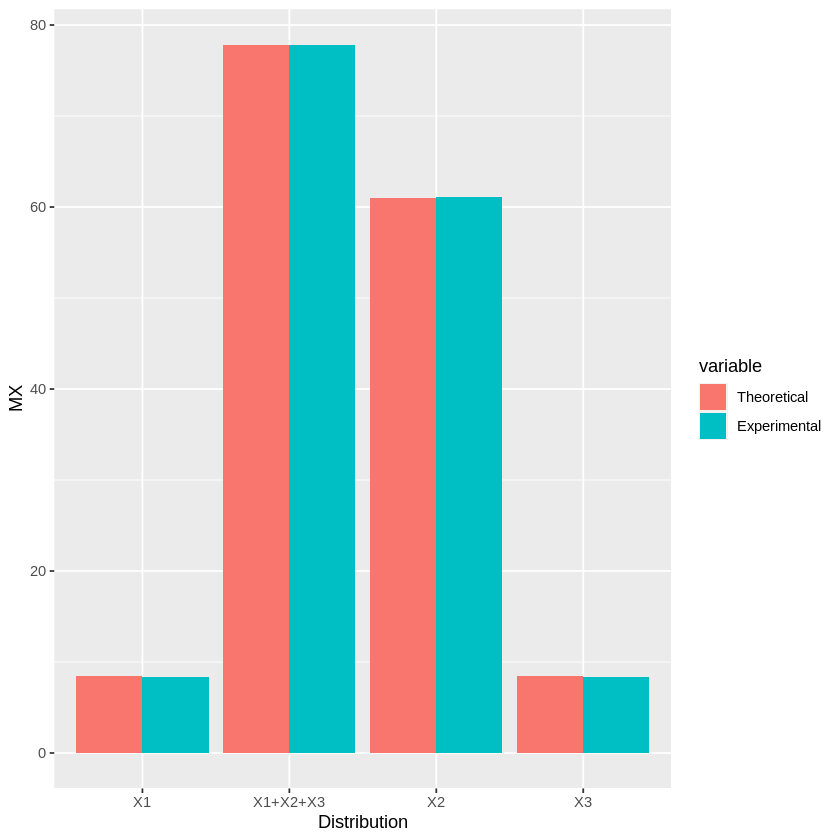

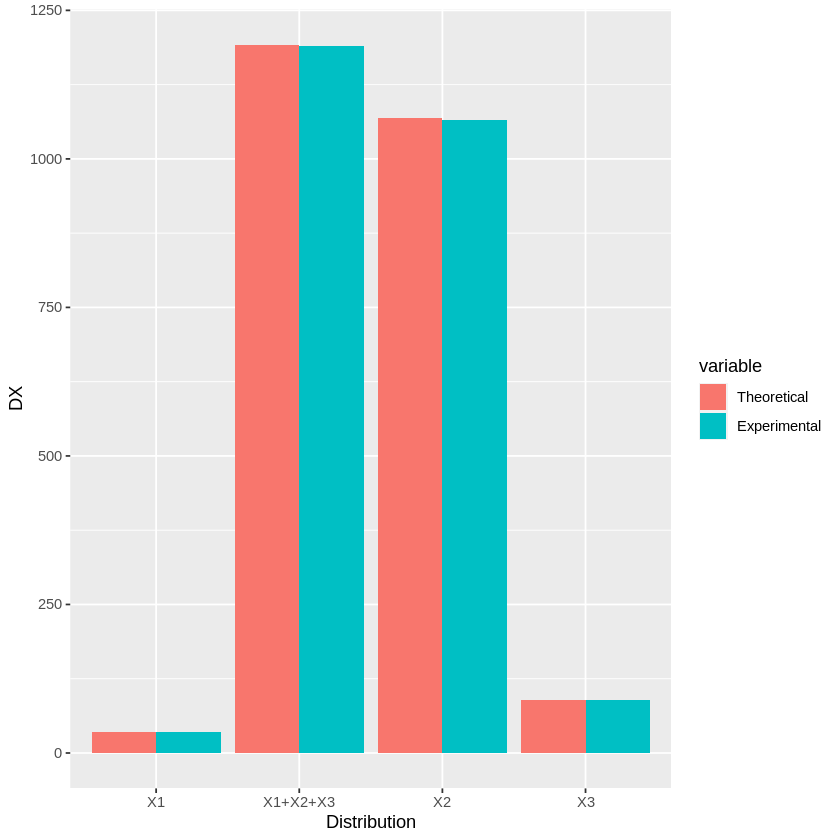

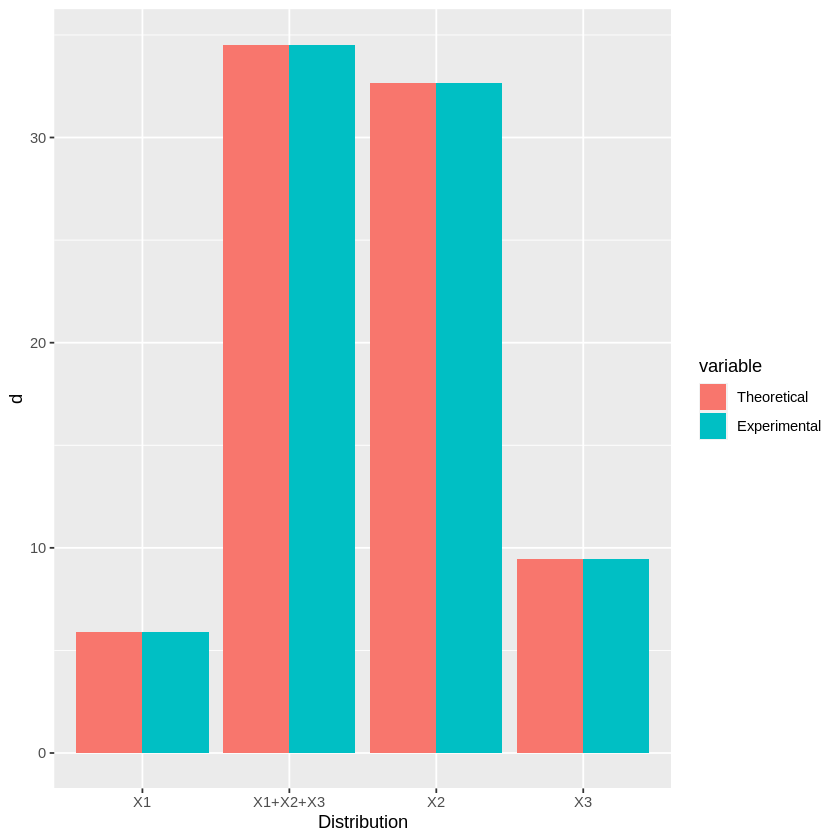

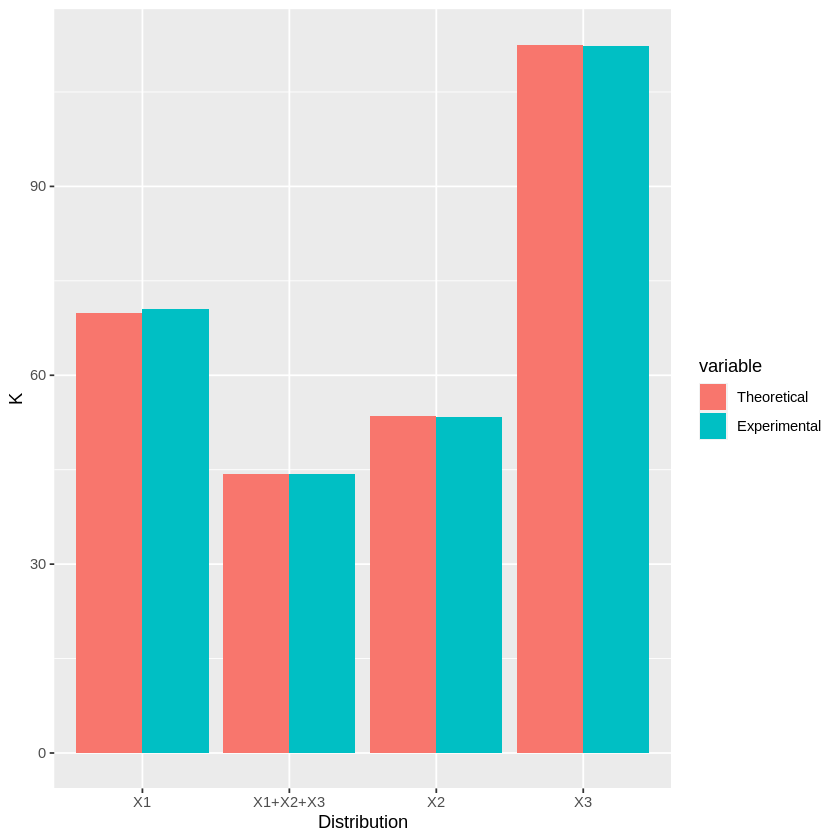

In [490]:
if (!require('reshape2')) {
  install.packages('reshape2')
  library(reshape2)
}
if (!require('ggplot2')) {
  install.packages('ggplot2')
  library(ggplot2)
}

PlotValues <- function(ValuesDf, YLabel) {
  df <- data.frame(Distribution=row.names(ValuesDf), Theoretical = ValuesDf[,1], Experimental = ValuesDf[,2])
  # View(df)
  df <- melt(df, id.vars = 'Distribution')

  ggplot(df, aes(Distribution, value, fill = variable)) +
    geom_col(position = "dodge") + labs(y=YLabel)
}


PlotValues(subset(resultsDf, select=1:2), 'MX')
PlotValues(subset(resultsDf, select=3:4), 'DX')
PlotValues(subset(resultsDf, select=5:6), 'd')
PlotValues(subset(resultsDf, select=7:8), 'K')

Так как количество значений N было выбрано большим, по верхним графикам сложно увидеть разницу в характеристиках. Построим графики, по которым можно сравнить теоретически вычисленные величины с экспериментально вычисленными в процентах.

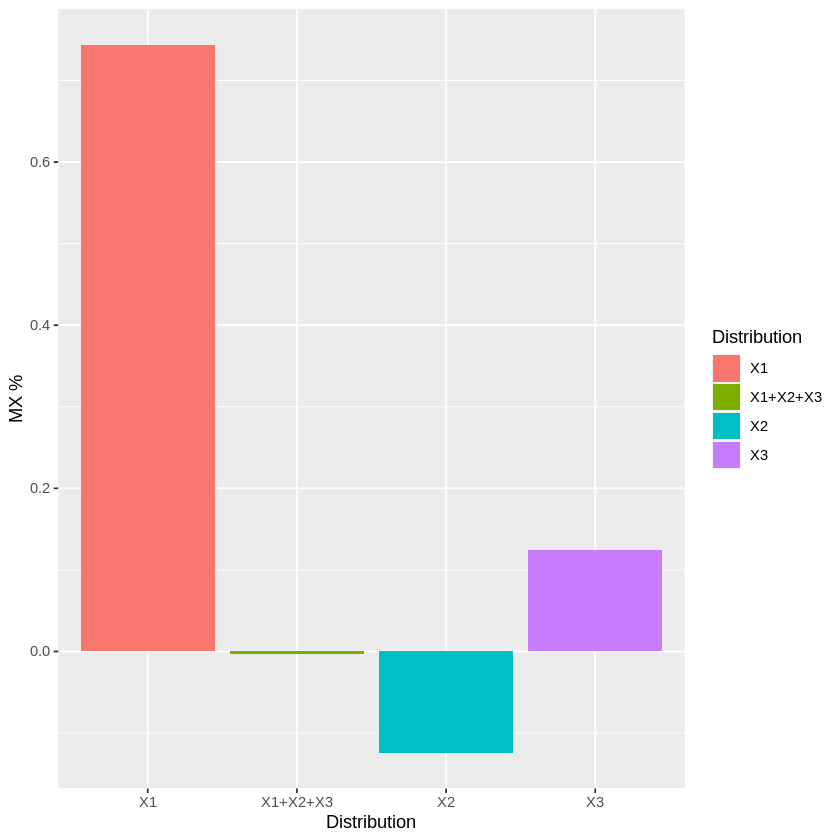

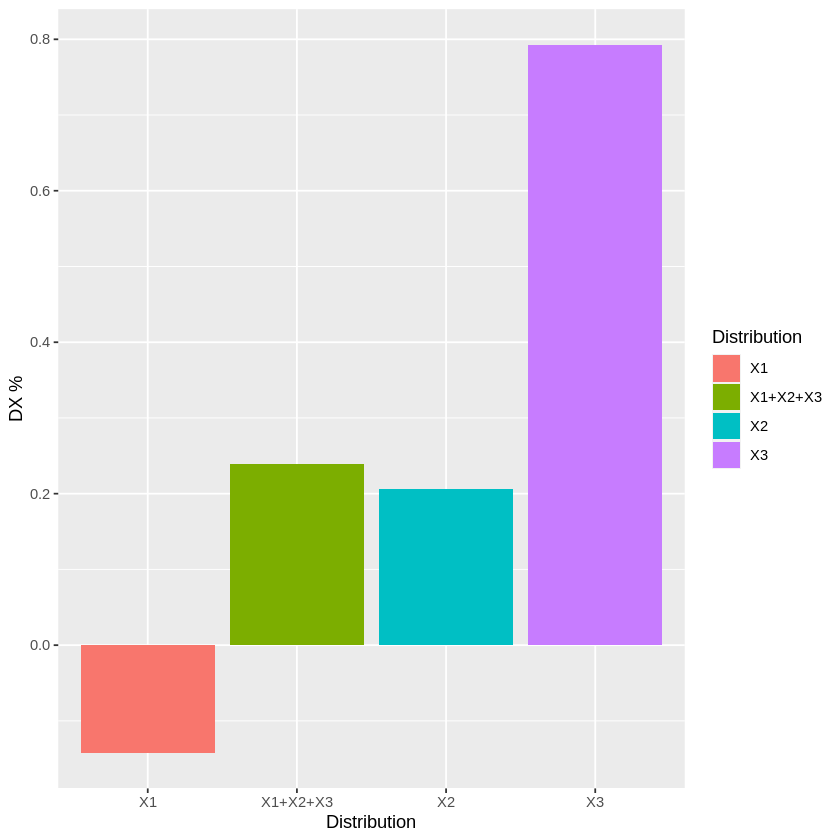

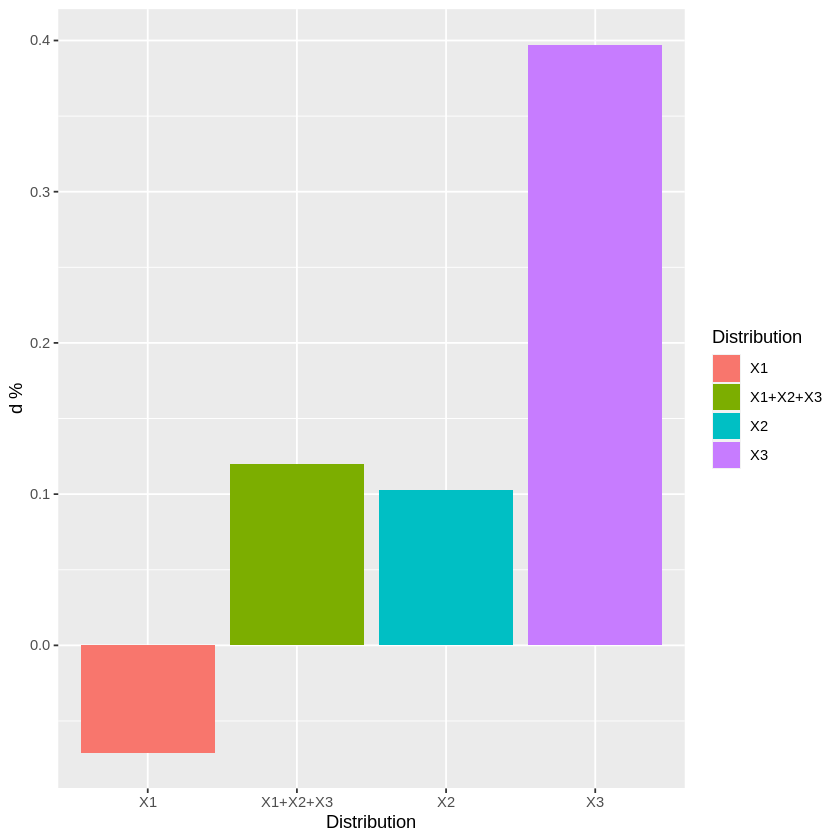

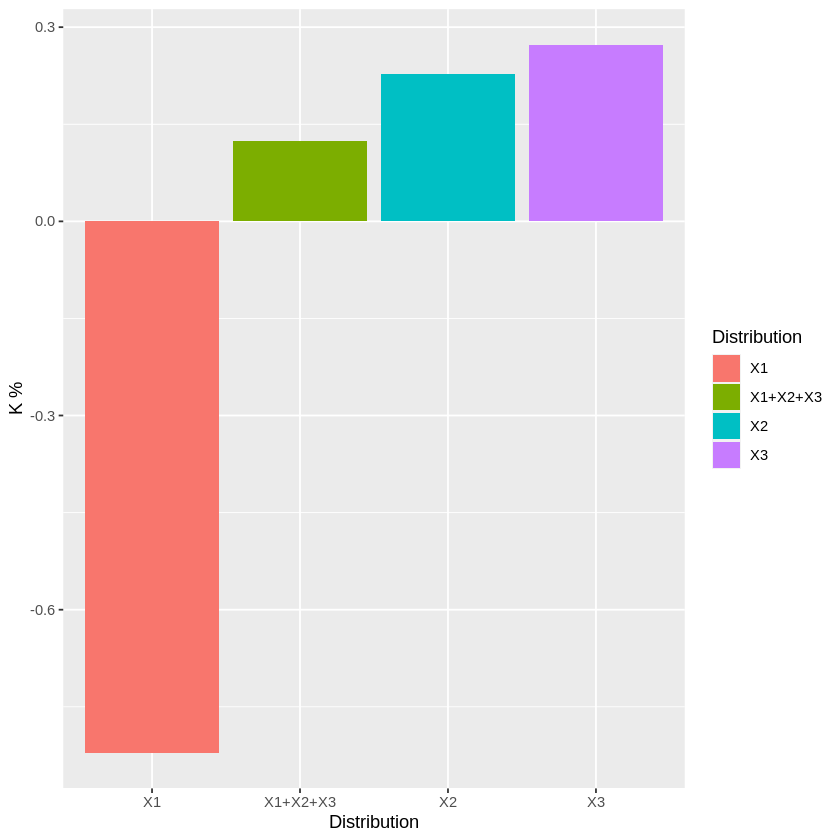

In [491]:
PlotPercentages <- function(ValuesDf, YLabel) {
  df <- data.frame(Distribution=row.names(ValuesDf), Percentages=(ValuesDf[,1] - ValuesDf[,2]) / ValuesDf[,1] * 100)

  ggplot(df, aes(x=Distribution, y=Percentages, fill = Distribution)) +
    geom_col(position = "dodge") + labs(y=paste(YLabel, '%'))
}

PlotPercentages(subset(resultsDf, select=1:2), 'MX')
PlotPercentages(subset(resultsDf, select=3:4), 'DX')
PlotPercentages(subset(resultsDf, select=5:6), 'd')
PlotPercentages(subset(resultsDf, select=7:8), 'K')

## Задание 1.2
Вычисление методом производящих функций

По нашей таблице построим функцию по формуле:
$P_{\zeta}(z) = \sum_{n}^{\infty}(p_{n} \cdot z^n)$, где n - значение переменной $\zeta$ (например, 2 у X1), а $p_n$ - соответствующая вероятность величины (например, вероятность получения P(X1 = 2) по таблице равна 0.4).

In [492]:
View(df)

X1,X2,X3,p1,p2,p3
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
2,43,2,0.40686825,0.1610350,0.53915046
11,87,37,0.32939564,0.1467735,0.07196561
15,96,11,0.09659285,0.3241292,0.33356559
19,73,15,0.10316386,0.0476192,0.03776129
9,21,25,0.06397940,0.3204431,0.01755706


$P_1(z) = 0.4 \cdot z^2 + 0.06 \cdot z^9 + 0.32 \cdot z^{11} + 0.09 \cdot z^{15} + 0.1 \cdot z^{19}$

$P_2(z) = 0.32 \cdot z^{21} + 0.16 \cdot z^{43} + 0.04 \cdot z^{73} + 0.14 \cdot z^{87} + 0.32 \cdot z^{96}$

$P_3(z) = 0.53 \cdot z^2 + 0.33 \cdot z^{11} + 0.03 \cdot z^{15} + 0.01 \cdot z^{25} + 0.07 \cdot z^{37}$

Посчитав в Maxima on line, получаем $P_{1+2+3}(z) = P_1(z) \cdot P_2(z) \cdot P_3(z)$:


$P_{1+2+3} = 0.00224\,z^{152}+0.002016\,z^{148}+0.007168\,z^{144}+
 9.8000000000000019 \cdot 10^{-4}\,z^{143}+0.001344\,z^{142}+
 3.2000000000000003 \cdot 10^{-4}\,z^{140}+
 8.8200000000000008 \cdot 10^{-4}\,z^{139}+
 2.8800000000000001 \cdot 10^{-4}\,z^{136}+0.012096\,z^{135}+
 5.8800000000000009 \cdot 10^{-4}\,z^{133}+0.001024\,z^{132}+
 1.4000000000000001 \cdot 10^{-4}\,z^{131}+0.001152\,z^{130}+
 2.8000000000000003 \cdot 10^{-4}\,z^{129}+1.26 \cdot 10^{-4}\,z^{
 127}+0.015344\,z^{126}+2.52 \cdot 10^{-4}\,z^{125}+0.001728\,z^{123
 }+0.012576\,z^{122}+0.0014\,z^{121}+
 5.7600000000000001 \cdot 10^{-4}\,z^{120}+
 1.6800000000000002 \cdot 10^{-4}\,z^{119}+0.033792\,z^{118}+
 0.021998\,z^{117}+0.006336\,z^{116}+
 5.6000000000000006 \cdot 10^{-4}\,z^{114}+0.024642\,z^{113}+0.00112
 \,z^{112}+2.52 \cdot 10^{-4}\,z^{111}+0.111424\,z^{109}+0.00742\,z
 ^{108}+0.013092\,z^{107}+0.008358\,z^{104}+0.001428\,z^{103}+
 0.110224\,z^{100}+0.002692\,z^{99}+0.004452\,z^{98}+
 7.2000000000000002 \cdot 10^{-5}\,z^{97}+0.005232\,z^{95}+0.00212\,
 z^{94}+7.9200000000000006 \cdot 10^{-4}\,z^{93}+0.033264\,z^{91}+
 0.002388\,z^{90}+6.7200000000000007 \cdot 10^{-4}\,z^{89}+
 1.6000000000000001 \cdot 10^{-4}\,z^{87}+0.012064\,z^{86}+0.001272
 \,z^{84}+1.44 \cdot 10^{-4}\,z^{83}+0.00448\,z^{82}+
 5.1200000000000009 \cdot 10^{-4}\,z^{79}+0.011296\,z^{77}+0.007728
 \,z^{73}+6.4000000000000005 \cdot 10^{-4}\,z^{70}+0.013456\,z^{69}+
 0.001632\,z^{67}+0.017216\,z^{65}+0.00848\,z^{64}+0.003168\,z^{63}+
 2.8800000000000001 \cdot 10^{-4}\,z^{61}+0.018512\,z^{60}+0.001024
 \,z^{57}+0.048256\,z^{56}+0.001152\,z^{55}+0.005088\,z^{54}+0.011424
 \,z^{51}+0.00128\,z^{48}+0.046496\,z^{47}+
 5.7600000000000001 \cdot 10^{-4}\,z^{45}+0.033792\,z^{43}+0.01696\,
 z^{42}+0.006336\,z^{41}+0.019104\,z^{38}+0.096512\,z^{34}+0.010176\,
 z^{32}+0.06784\,z^{25}$


К сожалению, взяв коэффициенты с такой точностью, результат дифференциала отличался на 6 единиц, поэтому перевел все это на expressions R языка
https://adv-r.hadley.nz/evaluation.html
https://stat.ethz.ch/R-manual/R-devel/library/stats/html/deriv.html:

In [493]:
p1 <- df$p1
p11 <- p1[1]
p12 <- p1[2]
p13 <- p1[3]
p14 <- p1[4]
p15 <- p1[5]

x1 <- df$X1
x11 <- x1[1]
x12 <- x1[2]
x13 <- x1[3]
x14 <- x1[4]
x15 <- x1[5]

p2 <- df$p2
p21 <- p2[1]
p22 <- p2[2]
p23 <- p2[3]
p24 <- p2[4]
p25 <- p2[5]

x2 <- df$X2
x21 <- x2[1]
x22 <- x2[2]
x23 <- x2[3]
x24 <- x2[4]
x25 <- x2[5]

p3 <- df$p3
p31 <- p3[1]
p32 <- p3[2]
p33 <- p3[3]
p34 <- p3[4]
p35 <- p3[5]

x3 <- df$X3
x31 <- x3[1]
x32 <- x3[2]
x33 <- x3[3]
x34 <- x3[4]
x35 <- x3[5]

PSum <- expression(
  (p11 * z^x11 + p12 * z^x12 + p13 * z^x13 + p14 * z^x14 + p15 * z^x15)
  * (p21 * z^x21 + p22 * z^x22 + p23 * z^x23 + p24 * z^x24 + p25 * z^x25)
  * (p31 * z^x31 + p32 * z^x32 + p33 * z^x33 + p34 * z^x34 + p35 * z^x35)
)

Получим $MX$, продифференцировав выражение и подставив в переменную 1:

In [494]:
DPSum <- D(PSum, 'z')
MX <- eval(DPSum, z<-1)
MX

[1] 77.85321

Получим $DX$ по формуле: $$DX(\zeta)=P''_{\zeta}(z)|_{z=1}+P'_{\zeta}(z)|_{z=1}-\left(P'_{\zeta}(z)\right)^2|_{z=1}$$

In [495]:
DX=eval(D(DPSum, 'z'), z<-1)+MX-eval(DPSum, z<-1)*eval(DPSum, z<-1)
DX

[1] 1192.418

Из $DX$ получим $dx$:

In [496]:
dx <- sqrt(DX);
dx

[1] 34.53141

И также $K$:

In [497]:
K <- dx/MX*100
K

[1] 44.35451

### Вывод
Сравним полученные с помощью производящей функции значения с теоретическими значениями, полученными по определению

In [498]:
df <- data.frame(
  MX=c(resultsDf$TheoreticalMX[4], MX),
  DX=c(resultsDf$TheoreticalDX[4], DX),
  dx=c(resultsDf$Theoreticaldx[4], dx),
   K=c(resultsDf$TheoreticalK[4],  K)
)
row.names(df) <- c('По определению', 'Производящая')
df

,MX,DX,dx,K
,<dbl>,<dbl>,<dbl>,<dbl>
По определению,77.85321,1192.428,34.53155,44.35469
Производящая,77.85321,1192.418,34.53141,44.35451


Как видно, точность очень высока.

## Задание 2.

Заданы три независимые целочисленные неотрицательные случайные величины $X_1, X_2, X_3$, распределенные по закону Пуассона, необходимо найти математическое ожидание, дисперсию, среднее квадратическое отклонение и коэффициент вариации случайной величины $X_1+X_2+X_3$ численно и теоретически.
Пареметры закона Пуассона для $X_1, X_2, X_3$ определить в соответствии с вариантом.

In [499]:
Variant <- 5
set.seed(Variant) 

coefficients=runif(3)

a1 <- coefficients[1]
a2 <- coefficients[2]
a3 <- coefficients[3]
a1;a2;a3

[1] 0.2002145

[1] 0.6852186

[1] 0.9168758

### Теоретически

Распределение Пуассона:
$$P_n=\frac{\left(\lambda \cdot \tau\right)^n}{n!}e^{-\lambda\cdot \tau}$$

In [500]:
library(stats)
N <- 100000

PoissonDf <- data.frame(X1 = rpois(N, a1), X2 = rpois(N, a2), X3 = rpois(N, a3))
View(PoissonDf)

X1,X2,X3
<int>,<int>,<int>
0,1,0
0,0,2
0,0,2
0,0,0
0,1,2
1,0,1
0,0,2
0,1,1
0,0,0


Из определения, математическое ожидание и дисперсия
$$D[X]=e^{-\lambda\tau}\left(M[X]^2e^{\lambda\tau}+M[X]e^{\lambda\tau}\right)-M[X]^2=M[X]=\lambda\tau$$

Мат. ожидание суммы независимых случайных величин равно сумме их мат. ожиданий. Для дисперсии аналогично

In [501]:
MX <- a1 + a2 + a3
DX <- MX
dx <- sqrt(DX)
K <- dx / MX * 100
PoissonResultsDf <- data.frame(Theoretical=c(MX, DX, dx, K))
rownames(PoissonResultsDf) <- c('MX', 'DX', 'dx', 'K')
View(PoissonResultsDf)

,Theoretical
,<dbl>
MX,1.802309
DX,1.802309
dx,1.342501
K,74.487843


### Через производящие функции

$$P(z)=\sum_{n=0}^\infty p_n z^n=\sum_{n=0}^\infty\frac{(\lambda t)^n}{n!}e^{-\lambda t}z^n=e^{-\lambda t}\cdot e^{\lambda t z}=e^{-\lambda t(1-z)}$$
$$P_1(z)=e^{-a_1(1-z)}$$
$$P_2(z)=e^{-a_2(1-z)}$$
$$P_3(z)=e^{-a_3(1-z)}$$
$$P_{sum}=P_1(z)*P_2(z)*P_3(z)$$

In [502]:
e = exp(1)

In [503]:
P = expression(
  (e^(-1 * a1 * (1-z))) *
  (e^(-1 * a2 * (1-z))) *
  (e^(-1 * a3 * (1-z)))
)
P

expression((e^(-1 * a1 * (1 - z))) * (e^(-1 * a2 * (1 - z))) * 
    (e^(-1 * a3 * (1 - z))))

Аналогично заданию 1.2 вычисляем математические характеристики

In [504]:
DP<-D(P, 'z')
DP

DDP<-D(DP, 'z')
DDP

-((e^(-1 * a1 * (1 - z))) * (e^(-1 * a2 * (1 - z))) * (e^(-1 * 
    a3 * (1 - z)) * (log(e) * (-1 * a3))) + ((e^(-1 * a1 * (1 - 
    z))) * (e^(-1 * a2 * (1 - z)) * (log(e) * (-1 * a2))) + e^(-1 * 
    a1 * (1 - z)) * (log(e) * (-1 * a1)) * (e^(-1 * a2 * (1 - 
    z)))) * (e^(-1 * a3 * (1 - z))))

((e^(-1 * a1 * (1 - z))) * (e^(-1 * a2 * (1 - z)) * (log(e) * 
    (-1 * a2))) + e^(-1 * a1 * (1 - z)) * (log(e) * (-1 * a1)) * 
    (e^(-1 * a2 * (1 - z)))) * (e^(-1 * a3 * (1 - z)) * (log(e) * 
    (-1 * a3))) + (e^(-1 * a1 * (1 - z)) * (log(e) * (-1 * a1)) * 
    (e^(-1 * a2 * (1 - z)) * (log(e) * (-1 * a2))) + e^(-1 * 
    a1 * (1 - z)) * (log(e) * (-1 * a1)) * (log(e) * (-1 * a1)) * 
    (e^(-1 * a2 * (1 - z))) + ((e^(-1 * a1 * (1 - z))) * (e^(-1 * 
    a2 * (1 - z)) * (log(e) * (-1 * a2)) * (log(e) * (-1 * a2))) + 
    e^(-1 * a1 * (1 - z)) * (log(e) * (-1 * a1)) * (e^(-1 * a2 * 
        (1 - z)) * (log(e) * (-1 * a2))))) * (e^(-1 * a3 * (1 - 
    z))) + ((e^(-1 * a1 * (1 - z))) * (e^(-1 * a2 * (1 - z))) * 
    (e^(-1 * a3 * (1 - z)) * (log(e) * (-1 * a3)) * (log(e) * 
        (-1 * a3))) + ((e^(-1 * a1 * (1 - z))) * (e^(-1 * a2 * 
    (1 - z)) * (log(e) * (-1 * a2))) + e^(-1 * a1 * (1 - z)) * 
    (log(e) * (-1 * a1)) * (e^(-1 * a2 * (1 - z)))) * (e^(-1 * 
    a3 * (1 - z)) * (l

$$M(\zeta)=P'_{\zeta}(z)|_{z=1}$$

In [505]:
MX<-eval(DP, z<-1)
MX

[1] 1.802309

$$D(\zeta)=P''_{\zeta}(z)|_{z=1}+P'_{\zeta}(z)|_{z=1}-\left(P'_{\zeta}(z)\right)^2|_{z=1}$$

In [506]:
DX <- eval(DDP, z<-1) + MX - eval(DP, z<-1) * eval(DP, z<-1)
DX

[1] 1.802309

Заметим, что $MX = DX$

Среднеквадратичное отклонение посчитаем из $DX$:

In [507]:
dx <- sqrt(DX)
dx

[1] 1.342501

Коэфиициент вариации тоже посчитаем из $DX$:



In [508]:
K <- dx / MX * 100
K

[1] 74.48784

В итоге получили:

In [509]:
PoissonResultsDf$P <- c(MX, DX, dx, K)
View(PoissonResultsDf)

,Theoretical,P
,<dbl>,<dbl>
MX,1.802309,1.802309
DX,1.802309,1.802309
dx,1.342501,1.342501
K,74.487843,74.487843


### Экспериментально

In [510]:
PoissonDf$Sum <- rowSums(PoissonDf)
View(PoissonDf)

X1,X2,X3,Sum
<int>,<int>,<int>,<dbl>
0,1,0,1
0,0,2,2
0,0,2,2
0,0,0,0
0,1,2,3
1,0,1,2
0,0,2,2
0,1,1,2
0,0,0,0


На основе последнего столбца посчитаем мат. характеристики:

In [511]:
S <- PoissonDf$Sum

MX <- mean(S)
DX <- var(S)
dx <- sqrt(DX)
K <- dx / MX * 100

PoissonResultsDf$Experimental <- c(MX, DX, dx, K)

PoissonResultsDf

,Theoretical,P,Experimental
,<dbl>,<dbl>,<dbl>
MX,1.802309,1.802309,1.802560
DX,1.802309,1.802309,1.816336
dx,1.342501,1.342501,1.347715
K,74.487843,74.487843,74.766718


### Итого

Характеристики, вычисленные различными способами сошлись:

In [512]:
View(PoissonResultsDf)

,Theoretical,P,Experimental
,<dbl>,<dbl>,<dbl>
MX,1.802309,1.802309,1.802560
DX,1.802309,1.802309,1.816336
dx,1.342501,1.342501,1.347715
K,74.487843,74.487843,74.766718


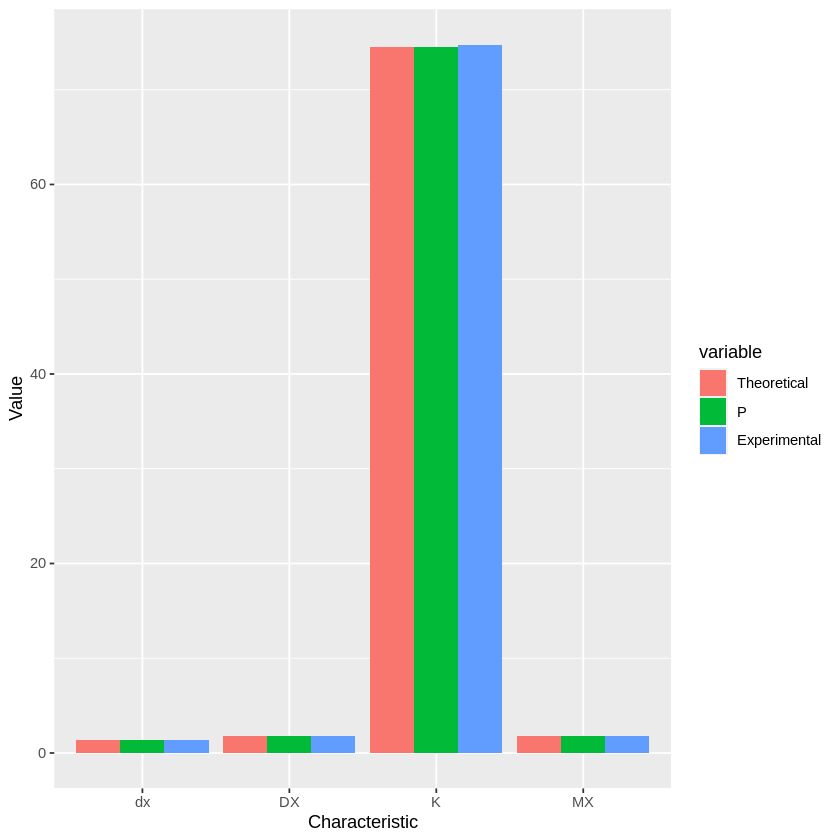

In [513]:
#   Делает то же, что и PlotValues, но нет жесткого хардкода на 2 колонки,
# так как в данном случае колонок немного и график читаем.
PlotValuesByColumns <- function(ValuesDf, YLabel) {
  df <- cbind(ValuesDf, Characteristic=row.names(ValuesDf))
  df <- melt(df, id.vars = 'Characteristic')

  ggplot(df, aes(Characteristic, value, fill = variable)) +
    geom_col(position = "dodge") + labs(y=YLabel)
}

PlotValuesByColumns(PoissonResultsDf, 'Value')

## Задание 3.
Обработка сообщения в специализированной ВС осуществляется K последовательными программами. Длительность работы
каждой программы представляет собой случайную величину, распределенную экспоненциально со средним значением $T=\frac{1}{\lambda}$. Найти преобразование Лапласа-Стилтьеса распределения длительности обработки сообщения в ВС, его математическое ожидание и дисперсию.

In [514]:
alpha<-runif(7)[7]
alpha

[1] 0.06860307

Пусть $\zeta$ - случайная величина, $F(t)=P(\zeta<t)$  - функция распределения вероятностей случайной величины $\zeta$,
$$B(F(t))=\beta(s)=\int_0^\infty e^{-st}dF(t)$$
$$F(t) = 1- e^{-\lambda t}$$
$$dF(t) = \lambda e^{-\lambda t} dt $$
$$\beta(s)=\int_0^\infty e^{-st} \lambda e^{-\lambda t} dt = \frac{\lambda}{(\lambda+s)}$$

In [515]:
B <- function(s) {
  return (alpha / (alpha + s))
}

Математическое ожидание случайной величины $\zeta$:
$$M(\zeta)=-\beta'(0)$$

Дисперсия
$$D(\zeta)=\beta''(0)-\left(\beta'(0)\right)^2$$

$$M(\zeta)= - (- \frac{\lambda}{(s+\lambda)^2}), s=0$$
$$M(\zeta)= \frac{1} \lambda $$


$$D(\zeta)=  \frac{\lambda (2 s + 2 \lambda)} {(s + \lambda)^4} -(-\frac\lambda {(s+\lambda)^2)})^2, s=0$$
$$D(\zeta)= \frac2 {\lambda^2} - \frac1 {\lambda^2} = \frac1 {\lambda^2} $$

In [516]:
math <- 1/alpha
DX <- 1/alpha^2
MX;DX

[1] 1.80256

[1] 212.4775

Проверим экспериментально полученые значения для одной случайной величины

In [517]:
N=100000
X <- rexp(N,alpha) 
mean(X)
var(X)

[1] 14.63168

[1] 215.0424

Теперь выведем формулы и проведем вычисления для суммы случайных величин

$$\beta_{sum}=\beta_{t1}(s) * \beta_{t2}(s)*...*\beta_{tk}(s) = (\beta_t(s))^k$$

Примем K произвольным.

In [518]:
P<-expression((alpha / (alpha + s))^k)
P

expression((alpha/(alpha + s))^k)

In [519]:
DP=D(P, 's')
DP

DDP=D(DP,'s')
DDP

-((alpha/(alpha + s))^(k - 1) * (k * (alpha/(alpha + s)^2)))

(alpha/(alpha + s))^(k - 1) * (k * (alpha * (2 * (alpha + s))/((alpha + 
    s)^2)^2)) + (alpha/(alpha + s))^((k - 1) - 1) * ((k - 1) * 
    (alpha/(alpha + s)^2)) * (k * (alpha/(alpha + s)^2))

In [520]:
MX <- 1/alpha
DX <- 1/alpha^2
MX;DX

[1] 14.57661

[1] 212.4775

Проверим экспериментально полученые значения для одной случайной величины

In [521]:
N=100000
X<-rexp(N,alpha) 
mean(X)
sd(X)^2

[1] 14.60292

[1] 211.1732

In [522]:
MX <- -1*eval(DP, s<-0)
MX

DX <- eval(DDP, s<-0) - (eval(DP, s<-0)^2)
DX

[1] 145.7661

[1] 2124.775

Проверим полученные значения экспериментально

Выберем произвольный K.

In [523]:
k = 10
RexpDf <- data.frame(X1=rexp(N, alpha))

for (i in 1:(k-1)) {
  RexpDf <- cbind(RexpDf, rexp(N, alpha))
}

colnames(RexpDf) <- lapply(1:k, function(i) paste('X', i, sep=''))

RexpDf$Sum <- rowSums(RexpDf)
View(RexpDf)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Sum
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15.2374064,27.0973905,14.271465,12.7561203,23.4337208,11.567228,9.3371880,3.979520,5.85324642,10.5578902,134.09118
18.1905200,15.6967398,9.866914,14.1622981,0.5168812,3.677484,9.1984651,6.411930,3.11123999,1.7706813,82.60315
9.7004120,0.5240162,6.369415,5.1252024,7.6637622,23.174958,10.5878393,4.800460,39.13875627,18.2676230,125.35244
50.8001174,28.9086502,23.923565,19.7326114,62.3221314,2.431435,0.3431034,1.610839,10.57802214,63.9053919,264.55587
19.6019421,1.5039653,22.904735,0.9617597,8.5944180,20.547476,17.6129448,16.069421,3.63232903,5.3510906,116.78008
4.9196059,6.7645486,18.497122,33.2236273,10.8654151,11.565958,7.7703795,1.181128,1.67546730,9.8239468,106.28720
11.9156155,1.0619482,7.674059,3.5041384,5.5080578,14.677836,9.9836593,4.146765,16.88370949,32.4999666,107.85576
5.2796379,9.8511943,12.808660,16.6761687,3.7400998,26.858509,10.5172552,19.974354,17.59223795,5.9569038,129.25502
2.7903154,0.9049463,4.470044,0.9800326,2.6729404,18.838361,16.3633914,8.988102,23.38108725,18.5205502,97.90977


In [524]:
mean(RexpDf$Sum)
var(RexpDf$Sum)

[1] 145.979

[1] 2148.214

## Задание 4

Доказать, что сумма величин, распределенных по закону Пуассона с параметрами $\alpha_1, \alpha_2,\ldots$ , распределена по закону Пуассона.

### Теоретически

Производящая функция величины, распределенной по закону Пуассона с параметром $\alpha_i$:
$$E_i(t) = e^{\alpha_i(t-1)}$$

Тогда производящая суммы величин:
$$E_{sum}(t) = \prod_i E_i(t) = \prod_i e^{\alpha_i(t-1)} = e^{\alpha(t-1)}$$ где $\alpha = \sum_i \alpha_i$

Как видно, производящая суммы схожа с производящей величины, распределенной по закону Пуассона с параметром $\alpha$. Сумма величин, распределенных по закону Пуассона, тоже распределена по закону Пуассона.

### Экспериментально
Проверим суждение эспериментально

Аналогично заданию 2, составим датасет, например, из четырех величин, имеющих распределение Пуассона: 

In [525]:
library(stats)
N <- 100000

MeanOccurence1 <- 50
X1=rpois(N, MeanOccurence1)

MeanOccurence2 <- 60
X2=rpois(N, MeanOccurence2)

MeanOccurence3 <- 70
X3=rpois(N, MeanOccurence3)

MeanOccurence4 <- 80
X4=rpois(N, MeanOccurence4)

PoissonDf <- data.frame(X1, X2, X3, X4)

View(PoissonDf)

X1,X2,X3,X4
<int>,<int>,<int>,<int>
63,58,63,81
38,53,69,79
39,52,63,61
47,57,65,73
42,71,69,69
45,59,67,75
50,64,64,76
43,64,68,79
46,60,72,79


Добавим в него столбец, соответствующий сумме величин.

In [526]:
PoissonDf$Sum <- PoissonDf$X1 + PoissonDf$X2 + PoissonDf$X3 + PoissonDf$X4
View(PoissonDf)

X1,X2,X3,X4,Sum
<int>,<int>,<int>,<int>,<int>
63,58,63,81,265
38,53,69,79,239
39,52,63,61,215
47,57,65,73,242
42,71,69,69,251
45,59,67,75,246
50,64,64,76,254
43,64,68,79,254
46,60,72,79,257


Тогда, согласно утверждению, новая величина будет тоже распределена по Пуассону, причем с параметром $\alpha = ∑_i \alpha_i$

In [527]:
PoissonResultsDf <- data.frame(
  X1=c(mean(PoissonDf$X1),var(PoissonDf$X1)),
  X2=c(mean(PoissonDf$X2),var(PoissonDf$X2)),
  X3=c(mean(PoissonDf$X3),var(PoissonDf$X3)),
  X4=c(mean(PoissonDf$X4),var(PoissonDf$X4))
)
row.names(PoissonResultsDf) <- c('MX', 'DX')

View(PoissonResultsDf)

,X1,X2,X3,X4
,<dbl>,<dbl>,<dbl>,<dbl>
MX,49.99769,59.98506,70.00758,79.97336
DX,49.89244,59.75271,69.88264,79.30452


$MX$ и $DX$ новой величины:

In [528]:
mean(PoissonDf$Sum);var(PoissonDf$Sum)

[1] 259.9637

[1] 259.1993

Если сложить $MX_i$ и $DX_i$ величин $X_i$, получим:

In [529]:
PoissonResultsDf$Sum <- PoissonResultsDf$X1 + PoissonResultsDf$X2 + PoissonResultsDf$X3 + PoissonResultsDf$X4
View(PoissonResultsDf)

,X1,X2,X3,X4,Sum
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MX,49.99769,59.98506,70.00758,79.97336,259.9637
DX,49.89244,59.75271,69.88264,79.30452,258.8323


Как видно, $MX = DX = \alpha_1 + \alpha_2 + \alpha_3 + \alpha_4$, теоретически выведенные утверждения сошлись с экспериментально полученными характеристиками.

## Задание 5.

Серверная станция состоит из двух модулей питания. Время безотказной работы каждого из них распределено по показательному закону с одинаковыми параметрами:
$$f(t)=\lambda e^{-\lambda t}$$
$t$ - время работы одного модуля до первого отказа.
Второй модуль питания включается сразу же после отказа первого. Определить плотность вероятности времени безотказной работы всей системы, а также математическое ожидание и дисперсию времени безотказной работы.

In [531]:
Variant<-5
alpha<-runif(100)[77]
alpha

[1] 0.6585388

Время безотказной работы всей системы равно сумме времени безотказной работы обоих модулей

$$t=t1+t2$$

$$F(t_i < T)=1-e^{-\lambda t_i}$$


Если заданы две независимые неотрицательные случайные величины $\zeta_1, \zeta_2$, то функция плотности распределения вероятностей композиции в виде суммы этих случайных величин $\zeta=\zeta_1+\zeta_2$ выразится:
$$f_{\zeta}=\int_{A(\zeta)}^{B(\zeta)} f_{\zeta_1}(\zeta_1)\cdot f_{\zeta_2}(\zeta-\zeta_1)d\zeta_1$$

Пределы интегрирования вычисляются:
$$A(\zeta)=a+\frac{\zeta-(a+d)+|\zeta-(a+d)|}{2}$$
$$B(\zeta)=b+\frac{\zeta-(b+c)-|\zeta-(b+c)|}{2}$$
$$a\leq \zeta_1\leq b, c\leq \zeta_2\leq d$$

$$a=0$$

$$b=\infty$$

$$c=0$$

$$d=\infty$$



$$A(\zeta)=o+\frac{\zeta-(0+\infty)+|\zeta-(0+\infty)|}{2}=\frac{\zeta-(0+\infty)-(\zeta-(0+\infty))}{2}=0$$

$$B(\zeta)=\infty+\frac{\zeta-(\infty+0)-|\zeta-(\infty+0)|}{2}=\infty+\frac{\zeta-\infty +(\zeta-\infty)}{2}=\zeta$$

$$f_{t_1}(t_1)=\lambda \cdot e^{-\lambda t_1}$$
$$f_{t_2}(t_2)=\lambda \cdot e^{-\lambda (t-t1)}$$

$$f_{t}=\int_{0}^{t} f_{t_1}(t_1)\cdot f_{t_2}(t-t_1)dt_1$$
$$f_{t}=\int_{0}^{t} \lambda \cdot e^{-\lambda t_1}\cdot \lambda \cdot e^{-\lambda (t-t1)}dt_1$$
$$f_{t}=\lambda ^2 \int_{0}^{t} e^{-\lambda t}dt_1$$
$$f_{t}=\lambda ^2 \frac t {e^{\lambda t}}$$
$$f_{t}=\lambda ^2  t \cdot {e^{-\lambda t}}$$

Это действительно соответствует плотности распределения функции Эрланга второго порядка

Таким образом мы определили плотность вероятности времени безотказной работы всей системы




Найдем математическое ожидание случайной величины, используя преобразование Лапласа-Стилтьеса.

$$\bar{f}_k(s)=\int_0^\infty e^{-st}\frac{\lambda\left(\lambda \cdot t\right)^k}{k!}e^{-\lambda\cdot t} dt=\frac{\lambda^{k+1}}{k!}\int_0^\infty e^{-(s+\lambda)t}t^kdt=\frac{\lambda^{k+1}}{k!}\frac{k!}{(s+\lambda)^{k+1}}=\frac{\lambda^{k+1}}{(s+\lambda)^{k+1}}$$


$$\beta_t(s)=\int_0^\infty e^{-st}f_{t1}(t)dt$$


$$\beta_t(s)=\int_0^\infty e^{-st} \lambda ^2  t \cdot {e^{-\lambda t}}dt$$
$$\beta_t(s)=\lambda ^2 \int_0^\infty e^{-st} t \cdot {e^{-\lambda t}}dt$$
$$\beta_t(s)=\lambda ^2 \int_0^\infty e^{-(s+\lambda)t}tdt$$
$$\beta_t(s)=\frac{\lambda ^2}{(s+\lambda)^2}$$

$$M[X]=\beta_t(s)|_{s=0}$$





In [532]:
beta <- expression(alpha^2 / (s+alpha)^2)
beta

expression(alpha^2/(s + alpha)^2)

In [533]:
MX <- eval(beta, s<-0)
MX

[1] 1

In [534]:
dbeta <- D(beta, 's')
dbeta

ddbeta <- D(dbeta, 's')
ddbeta

-(alpha^2 * (2 * (s + alpha))/((s + alpha)^2)^2)

-(alpha^2 * 2/((s + alpha)^2)^2 - alpha^2 * (2 * (s + alpha)) * 
    (2 * (2 * (s + alpha) * ((s + alpha)^2)))/(((s + alpha)^2)^2)^2)

In [536]:
DX <- eval(ddbeta, s<-0) - MX^2
DX

[1] 12.8353